In [64]:
# !pip install statsmodels
# Imports
from osprey.config import Config
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


## Load and clean data

In [65]:
root_dir = './data/hyperparamopt/fs-peptide'
# Load Configuation Files
databases = {'bayesian':root_dir+'/gp-m52-ei-tica-indv/config-all_tor.yaml', 
             'random':root_dir+'/rand-tica-indv/config_random-all_tor.yaml', 
             'sobol':root_dir+'/sobol-tica-indv/config-all_tor.yaml', 
             'tpe':root_dir+'/tpe-s20-g25-tica-indv/config-all_tor.yaml'}

all_dfs = []
for k, v in databases.items():
    config = Config(v)
    df = config.trial_results()
    df['method'] = k
    all_dfs.append(df)
    
df_all = pd.concat(all_dfs)



Loading config file:     ./data/hyperparamopt/fs-peptide/gp-m52-ei-tica-indv/config-all_tor.yaml...
Loading trials database: sqlite:///osprey-trails.db...
Loading config file:     ./data/hyperparamopt/fs-peptide/rand-tica-indv/config_random-all_tor.yaml...
Loading trials database: sqlite:///osprey-trails.db...
Loading config file:     ./data/hyperparamopt/fs-peptide/sobol-tica-indv/config-all_tor.yaml...
Loading trials database: sqlite:///osprey-trails.db...
Loading config file:     ./data/hyperparamopt/fs-peptide/tpe-s20-g25-tica-indv/config-all_tor.yaml...
Loading trials database: sqlite:///osprey-trails.db...


In [66]:
df_all.head()

,completed,config_sha1,elapsed,host,id,mean_test_score,mean_train_score,n_test_samples,n_train_samples,parameters,project_name,started,status,test_scores,traceback,train_scores,user,method
0,2017-06-25 13:14:13.918401,3e135d8aedd11ba85476cf9c8af5a22d383f4453,1970-01-01 00:01:05.177241,Blaze,1,1.365817,2.961204,"[14000, 14000, 14000, 14000, 14000]","[14000, 14000, 14000, 14000, 14000]","{'tica__lag_time': 868, 'close_cont__scheme': ...",close_cont,2017-06-25 13:13:08.741160,SUCCEEDED,"[1.3776911158951748, 1.3740749840217341, 1.264...",None,"[2.9389462312306645, 2.950642052871998, 2.9298...",robarbon,bayesian
1,2017-06-25 13:13:35.581546,54a6a14c45793f757e17c2dc7aabb03f8d523801,1970-01-01 00:00:26.830951,Blaze,2,1.102779,1.986818,"[14000, 14000, 14000, 14000, 14000]","[14000, 14000, 14000, 14000, 14000]","{'msm__prior_counts': 0, 'tica__commute_mappin...",chi_tor,2017-06-25 13:13:08.750595,SUCCEEDED,"[1.0684842211915222, 1.1161358818514298, 1.143...",None,"[2.0313664449993496, 1.902029834442478, 1.9717...",robarbon,bayesian
2,2017-06-25 13:15:14.257250,61bca343a9a7f1ecad92ffd0aff96cd3092f1089,1970-01-01 00:02:05.481315,Blaze,3,1.599413,2.996799,"[14000, 14000, 14000, 14000, 14000]","[14000, 14000, 14000, 14000, 14000]","{'tica__lag_time': 528, 'cluster__max_no_impro...",alpha_angle,2017-06-25 13:13:08.775935,SUCCEEDED,"[1.419293959877178, 2.459780516990084, 1.42471...",None,"[2.9952122086182973, 2.9991551430503254, 2.996...",robarbon,bayesian
3,2017-06-25 13:13:47.457845,f00ec6c70f38246aceededbb5915632206c5992a,1970-01-01 00:00:38.657418,Blaze,4,1.921110,2.992483,"[14000, 14000, 14000, 14000, 14000]","[14000, 14000, 14000, 14000, 14000]","{'tica__shrinkage': None, 'cluster__random_sta...",all_tor,2017-06-25 13:13:08.800427,SUCCEEDED,"[1.266771869867596, 2.1699129867494955, 2.1975...",None,"[2.9829218758783957, 2.994692237174925, 2.9937...",robarbon,bayesian
4,2017-06-25 13:19:46.849272,5e1c7f4f0c8a5a7dff94ce8de5b49e9cf080aa69,1970-01-01 00:06:38.031110,Blaze,5,1.665484,2.997487,"[14000, 14000, 14000, 14000, 14000]","[14000, 14000, 14000, 14000, 14000]","{'msm__verbose': False, 'close-h_cont__soft_mi...",close-h_cont,2017-06-25 13:13:08.818162,SUCCEEDED,"[1.502631858780357, 2.094233568665083, 1.25880...",None,"[2.998903280162028, 2.993679670790958, 2.99892...",robarbon,bayesian


In [67]:
df = df_all.loc[:, ['parameters', 'project_name','mean_test_score', 'mean_train_score', 'test_scores', 'train_scores', 'method', 'completed']]

In [68]:
df.rename(columns={'project_name':'basis'}, inplace=True)

In [69]:
params = ['cluster__n_clusters', 'tica__n_components', 'tica__lag_time']
for param in params:
    df[param.split('__')[1]] = df['parameters'].apply(lambda x: x[param])
# Retrieve Trial Results
df.to_csv('./data/all_methods_results.csv')

In [7]:
df.groupby(['method', 'basis'])['parameters'].count()

method    basis       
bayesian  all_tor         192
          alpha_angle     191
          ca_cont         199
          chi_tor         198
          close-h_cont    200
          close_cont      200
          hb_pairs        191
          kappa_angle     196
random    all_tor         199
          alpha_angle     197
          ca_cont         199
          chi_tor         218
          close-h_cont    200
          close_cont      199
          drid            200
          ff_all_ang      200
          ff_bb_ang       200
          ff_re_ang       200
          hb_pairs        199
          kappa_angle     200
          ppo_tor         149
sobol     all_tor         197
          alpha_angle     196
          ca_cont         198
          chi_tor         200
          close_cont      200
          hb_pairs        197
          kappa_angle     162
tpe       all_tor         198
          alpha_angle     198
          ca_cont         198
          chi_tor         198
          close_c

In [8]:
df.rename(columns={'mean_test_score': 'test', 'mean_train_score': 'train'}, inplace=True)
df_melt = pd.melt(frame=df, id_vars = df.columns.difference(['test', 'train']), 
                 value_vars=['test', 'train'], 
                var_name='score_type', value_name='score_value')
df_melt.head()

,basis,completed,lag_time,method,n_clusters,n_components,parameters,test_scores,train_scores,score_type,score_value
0,close_cont,2017-06-25 13:14:13.918401,868,bayesian,216,7,"{'tica__lag_time': 868, 'close_cont__scheme': ...","[1.3776911158951748, 1.3740749840217341, 1.264...","[2.9389462312306645, 2.950642052871998, 2.9298...",test,1.365817
1,chi_tor,2017-06-25 13:13:35.581546,123,bayesian,719,8,"{'msm__prior_counts': 0, 'tica__commute_mappin...","[1.0684842211915222, 1.1161358818514298, 1.143...","[2.0313664449993496, 1.902029834442478, 1.9717...",test,1.102779
2,alpha_angle,2017-06-25 13:15:14.257250,528,bayesian,503,9,"{'tica__lag_time': 528, 'cluster__max_no_impro...","[1.419293959877178, 2.459780516990084, 1.42471...","[2.9952122086182973, 2.9991551430503254, 2.996...",test,1.599413
3,all_tor,2017-06-25 13:13:47.457845,909,bayesian,245,6,"{'tica__shrinkage': None, 'cluster__random_sta...","[1.266771869867596, 2.1699129867494955, 2.1975...","[2.9829218758783957, 2.994692237174925, 2.9937...",test,1.921110
4,close-h_cont,2017-06-25 13:19:46.849272,228,bayesian,990,10,"{'msm__verbose': False, 'close-h_cont__soft_mi...","[1.502631858780357, 2.094233568665083, 1.25880...","[2.998903280162028, 2.993679670790958, 2.99892...",test,1.665484


In [9]:
df['completed'] = pd.to_datetime(df['completed'])

## Figure: CV_score distribution



In [35]:
common_sets = list({x for x in df.loc[df.method=='sobol', 'basis'].unique()} \
                & {x for x in df.loc[df.method=='random', 'basis'].unique()} \
                & {x for x in df.loc[df.method=='bayesian', 'basis'].unique()} \
                & {x for x in df.loc[df.method=='tpe', 'basis'].unique()})

idx = (df.basis.isin(common_sets))


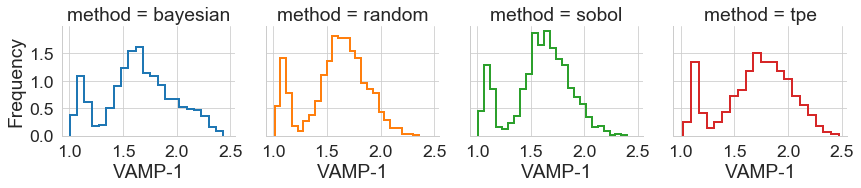

In [25]:
with sns.plotting_context('paper', font_scale=2):
    # Select sample
    sns.set_style('whitegrid')
    sample = df.loc[idx ,:]
    g = sns.FacetGrid(data=sample, col='method', hue='method')
    g.map(sns.distplot, 'test', hist=True, norm_hist=True, 
          hist_kws={'histtype': 'step', 'linewidth': 2, 'alpha': 1}, 
          kde=False, )
    g.set(xlabel='VAMP-1')
    g.axes[0][0].set_ylabel('Frequency')
    
    plt.savefig('figures/score_method_distribution.png', bbox_inches='tight')


## Figure: scores by rank

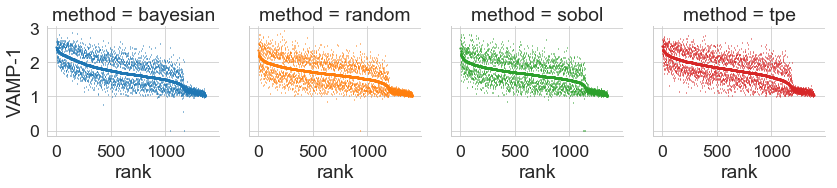

In [33]:

sample = df.loc[idx, :].copy()
sample.loc[:, 'rank'] = sample.groupby(['method'])['test'].rank(ascending=False)
sample.loc[:, 'test_min'] = sample.loc[:, 'test_scores'].apply(lambda x: np.min(x))
sample.loc[:, 'test_max'] = sample.loc[:, 'test_scores'].apply(lambda x: np.max(x))

with sns.plotting_context('paper', font_scale=2):

    g = sns.FacetGrid(sample, col='method', hue='method')
    g.map(plt.scatter, 'rank', 'test',  linewidth=0., marker='o', s=5)
    g.map(plt.scatter, 'rank', 'test_min', marker='_', s=1, lw=2, alpha=0.5)
    g.map(plt.scatter, 'rank', 'test_max', marker='_', s=1, lw=2, alpha=0.5)
#     g.set(xlim=(0,10))
    g.axes[0][0].set_ylabel('VAMP-1')
    plt.savefig('figures/scores_ranked.png')
#     g.set(ylim=(1.8,2.5))

## Figure: incumbent trajectory


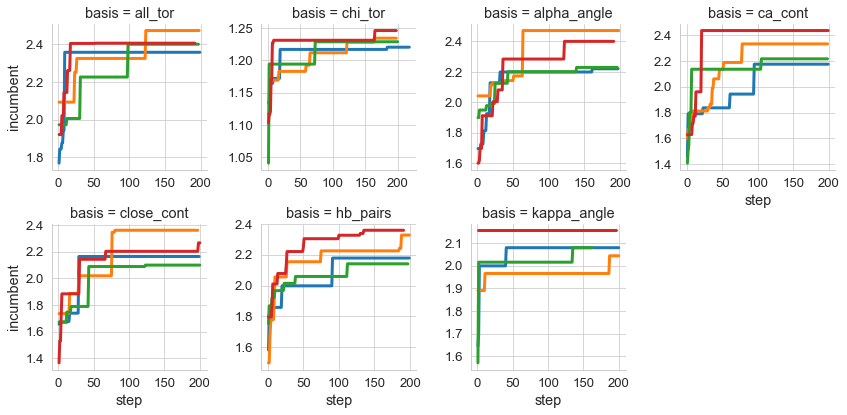

In [52]:

sample = df.loc[idx, :].copy()
sample.sort_values(by=['completed'], inplace=True)
sample.loc[:, 'step'] = sample.groupby(['method', 'basis'])['completed'].rank(ascending=True)
sample.loc[:, 'test_norm'] = sample.groupby(['method', 'basis'])['test'].transform(lambda x: x/x.max())
sample.loc[:, 'incumbent_norm'] = sample.groupby(['method', 'basis'])['test_norm'].cummax()
sample.loc[:, 'incumbent'] = sample.groupby(['method', 'basis'])['test'].cummax()


with sns.plotting_context('paper', font_scale=1.5):

    g = sns.FacetGrid(sample, col='basis', hue='method', col_wrap=4, sharex=False, sharey=False)
    g.map(plt.plot, 'step', 'incumbent', lw=3)
#     g.axes[0,0].set_ylabel('VAMP-1')
#     plt.legend(bbox_to_anchor=(1,1.05))
    plt.savefig('figures/incumbent_trajectory.png')

## Figure: time to best

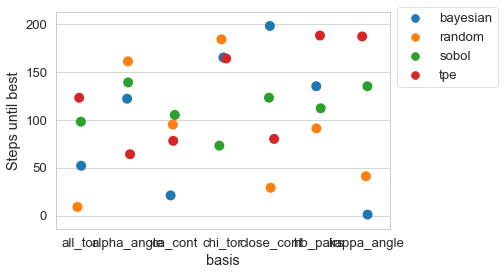

In [44]:
sample.loc[:, 'incumbent_norm_binary'] = abs(sample.loc[:, 'incumbent_norm'] - 1.0) < 1e-8


best_times = sample.query("incumbent_norm_binary").\
    groupby(['method', 'basis']).aggregate(np.min).\
    loc[:, ['step']].\
    reset_index()

with sns.plotting_context('paper', font_scale=1.5):
    sns.stripplot(y='step',x='basis',  data=best_times, hue='method', 
                 s=10)
    plt.ylabel('Steps until best')
    plt.legend(bbox_to_anchor=(1,1.05))
    plt.savefig('')

In [53]:
# df2['current_best'] = df2.loc[:,['method', 'project_name', 'mean_test_score']].groupby(['method', 'project_name']).cummax()

# df2['current_best_error'] = 0

# df2['is_current_best'] = (df2['current_best'] - df2['mean_test_score']).abs() < 1e-6

# df2['current_best_error'] = (df2['is_current_best']*1)*df2['test_error']

# df2.loc[df2['current_best_error']==0, ['current_best_error']]=None

# df2.sort_values(by=['method', 'project_name', 'iteration'],inplace=True)

# df2.fillna(method='ffill', inplace=True)

# df2.sort_values(by=['method', 'project_name']).tail()

# df3 = df2.drop(labels = ['parameters', 'test_scores', 'train_scores', 'is_current_best'], axis=1, inplace=False)

# df3.head()

# df3.rename(columns={'mean_test_score': 'test_score', 'mean_train_score': 'train_score', 'project_name':'basis'}, inplace=True)

# df3.head()

# idvars = [x for x in list(df3.columns) if x not in ['n_clusters','n_components','lag_time']]
# idvars



# df4 = df3.melt(id_vars=idvars)

# df4.head()

# df4.sort_values(by=['basis', 'method','iteration', 'variable'])

# df4.to_pickle('all_result.pickl')

# import seaborn as sns

# ## Current Best Trajectory

# from copy import copy
# cb = copy(df3)
# cb = cb.loc[cb['iteration']<=200, :]
# cb['current_best_err_low'] = cb['current_best'] - 1.96*cb['current_best_error']
# cb['current_best_err_high'] = cb['current_best'] + 1.96*cb['current_best_error']

# # ...       .set(xlim=(0, 60), ylim=(0, 12),
# # ...            xticks=[10, 30, 50], yticks=[2, 6, 10]))
# sns.set_style('whitegrid')
# sns.set_palette('colorblind')
# cols = sns.color_palette('colorblind', 3)
# for name, grp in cb.groupby(['method']):
#     with sns.plotting_context('talk', font_scale=1):
#         print(name)
#         g = sns.FacetGrid(data = grp, col='basis', col_wrap=5)
#         g.map(plt.plot, 'iteration', 'test_score', alpha=0.5, color=cols[0])
#         g.map(plt.plot, 'iteration', 'current_best',color=cols[1])
#         g.map(plt.plot, 'iteration', 'current_best_err_high',color=cols[2], alpha=0.5)
#         g.map(plt.plot, 'iteration', 'current_best_err_low',color=cols[2], alpha=0.5)
#         g.set_axis_labels('Iteration', 'GMRQ')
#         g.set(ylim=(1,3))
#         plt.savefig('current_best_traj-'+name+'.png')

# ## Time till best 

# idx = df3.groupby(['method', 'basis'])['current_best'].transform(max) == df3['current_best']
# only_best = df3.loc[idx, :]
# only_best.head()

# idx = only_best.groupby(['method', 'basis'])['iteration'].transform(min) == only_best['iteration']
# only_best = only_best.loc[idx, :]
# only_best.head()

# vc = only_best.groupby(['method'])['basis'].count()
# keep_bases = only_best.loc[only_best['method']==np.argmin(vc), ['basis']].values
# keep_bases = list(keep_bases.flatten())
# only_best = only_best.loc[only_best['basis'].isin(keep_bases), :]


# # # Load the example tips dataset
# # tips = sns.load_dataset("tips")

# # # Draw a nested boxplot to show bills by day and sex
# # sns.boxplot(x="day", y="total_bill", hue="sex", data=tips, palette="PRGn")
# # sns.despine(offset=10, trim=True)
# with sns.plotting_context('talk', font_scale=2):

#     ax=sns.boxplot(x="method", y="iteration", data=only_best, palette='colorblind')
#     sns.despine(offset=10, trim=False)
#     sns.swarmplot(x="method", y="iteration", data=only_best, color='k', s=20, alpha=0.5)
#     ax.set_ylabel('iterations')
#     plt.savefig('time_till_best.png')


# ## Compare best scores

# with sns.plotting_context('talk', font_scale=2):

#     ax=sns.boxplot(x="method", y="current_best", data=only_best, palette='colorblind')
#     sns.despine(offset=10, trim=False)
#     sns.swarmplot(x="method", y="current_best", data=only_best, color='k', s=20, alpha=0.5)
#     ax.set_ylabel('iterations')
#     plt.savefig('best_scores_boxplot.png')

## Compare best individual scores

In [54]:
# # g = sns.factorplot(x="class", y="survived", hue="sex", data=titanic,
# #                    size=6, kind="bar", palette="muted")
# # g.despine(left=True)
# # g.set_ylabels("survival probability")
# with sns.plotting_context('talk', font_scale=2):

#     g = sns.factorplot(x="basis", y="current_best", hue="method", data=only_best,
#                        size=10, kind="bar", palette="colorblind")
#     g.despine(left=True)
#     g.set_xticklabels(rotation=30)
#     g.set_ylabels('GMRQ')
#     g.set(ylim=(1,3))
#     plt.savefig('best_ind_scores.png')

## Compare best methods and parameters

In [55]:
# idx = only_best.groupby(['method'])['current_best'].transform(max) == only_best['current_best']
# best_basis = only_best.loc[idx, :]
# best_basis.head()
# best_basis_melt = pd.melt(best_basis, id_vars=['basis', 'method', 'current_best', 'current_best_error'], value_vars=['n_clusters','n_components', 'lag_time'] )
# best_basis_melt

In [56]:
# count = 0
# with sns.plotting_context('talk', font_scale=2):
#     fig, axes = plt.subplots(ncols=3, figsize=(20,10))

#     for name, grp in best_basis_melt.groupby(['variable']):
#         ax = axes[count]
#         sns.barplot(x="method", y="value", data=grp, ax = ax)
#         ax.set_ylabel(name)
#         for item in ax.get_xticklabels():
#             item.set_rotation(45)
#         count += 1
        

# plt.tight_layout()
# plt.savefig('compare-methods-params.png')
# #         fig.close()
# #     g = sns.FacetGrid(col="variable", hue="method", data=best_basis_melt)
# #     g.map(plt.bar, 'method', 'value')
# # #     g.despine(left=True)
# # #     g.set_xticklabels(rotation=30)
# # #     g.set_ylabels('GMRQ')
# # #     plt.savefig('compare_params.png')

## Param trajectories for best method/basis


In [ ]:
best_pairs = best_basis.loc[:, ['basis', 'method']].values
best_pairs

In [57]:

# # sns.set_style('whitegrid')
# # sns.set_palette('colorblind')
# # cols = sns.color_palette('colorblind', 3)
# # for name, grp in cb.groupby(['method']):
# #     with sns.plotting_context('talk', font_scale=1):
# #         print(name)
# #         g = sns.FacetGrid(data = grp, col='basis', col_wrap=5)
# #         g.map(plt.plot, 'iteration', 'test_score', alpha=0.5, color=cols[0])
# #         g.map(plt.plot, 'iteration', 'current_best',color=cols[1])
# #         g.map(plt.plot, 'iteration', 'current_best_err_high',color=cols[2], alpha=0.5)
# #         g.map(plt.plot, 'iteration', 'current_best_err_low',color=cols[2], alpha=0.5)
# #         g.set_axis_labels('Iteration', 'GMRQ')
# #         g.set(ylim=(1,3))
# #         plt.savefig('current_best_traj-'+name+'.png')
# params = best_basis_melt['variable'].unique()
# all_trajs = []
# for x in best_pairs:
#     traj = cb.loc[(cb['basis']==x[0]) & (cb['method']==x[1]), :]
#     all_trajs.append(traj)
# trajs = pd.concat(all_trajs)
# trajs.head()

In [59]:
# trajs.tail()

# trajs_melt = pd.melt(trajs, id_vars = ['iteration', 'method', 'basis', 'test_score'], value_vars = ['n_clusters', 'n_components', 'lag_time'])

# trajs_melt.head()

# with sns.plotting_context('talk', font_scale=2):

#     for name, grp in trajs_melt.groupby('variable'):
#         g = sns.FacetGrid(data = grp, col='method', hue='method', size=5)
#         g.map(plt.scatter,  'value', 'test_score', alpha=0.7)
#         g.set_axis_labels(name, 'GMRQ')
#     #     g.map(plt.plot, 'iteration', 'current_best', )
#         plt.savefig('param_traj-'+name+'.png')


# #